## Flujo de trabajo de un proyecto de Machine Learning

# Entrenar y probar los modelos

- Cuando trabajamos en un problema de clasificación debemos prevenir problemas como el overfitting
- Para ello, muchos investigadores dividen su conjunto de datos en dos subconjuntos: entrenamiento y validación
- Sin embargo, esto es, en general, insuficiente para ajustar los parámetros del algoritmo de aprendizaje
- Una mejor aproximación sería dividir el conjunto de datos en: entrenamiento, validación y test

## Preparación del dataset de entrenamiento

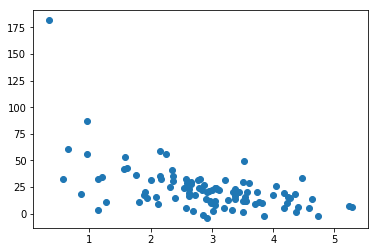

In [3]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

In [5]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

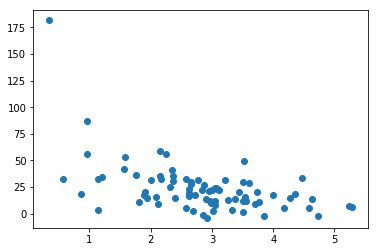

In [6]:
scatter(trainX, trainY)

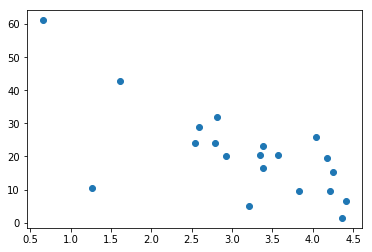

In [8]:
scatter(testX, testY)

## Métricas de evaluación

**Accuracy**

La exactitud (ACC) mide la fracción de predicciones correctas. El rango va de 0 a 1. Un mayor valor indica una mayor exactitud predictiva:


**Precisión**

La precisión mide la fracción de positivos reales entre los ejemplos que se prevén como positivos. El rango va de 0 a 1. Un mayor valor indica una mayor exactitud predictiva:

**Recall**

El recall mide la fracción de positivos reales que se prevén como positivos. El rango va de 0 a 1. Un mayor valor indica una mayor exactitud predictiva:

**Tasa de falsos positivos (FPR)**

La tasa de positivos falsos (FPR) mide la tasa de alarma falsa o la fracción de los negativos reales que se prevén como positivos. El rango va de 0 a 1. Un valor bajo indica una mayor exactitud predictiva:

## Validación cruzada

- La validación cruzada es una técnica para evaluar modelos de ML mediante el entrenamiento de varios modelos de ML en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos. 
- Se utiliza para detectar el sobreajuste, es decir, en aquellos casos en los que no se logre generalizar un patrón.

En el siguiente diagrama se muestra un ejemplo de los subconjuntos de entrenamiento y de los subconjuntos de evaluación complementarios generados para cada uno de los cuatro modelos que se crean y se entrenan durante una validación cruzada de 4 iteraciones. El modelo uno utiliza el primer 25% de los datos para la evaluación y el 75% restante para el entrenamiento. El modelo dos utiliza el segundo subconjunto del 25% (del 25% al 50%) para la evaluación y los tres subconjuntos restantes de los datos para el entrenamiento y así sucesivamente.


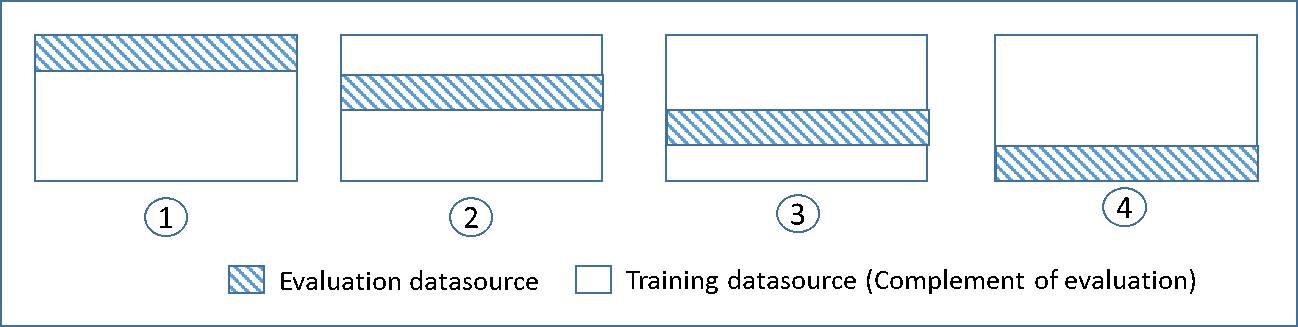
[Ref](https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/cross-validation.html)

### K-fold cross validation
Podemos modificar la fase de aprendizaje para disminuir la varianza del modelo
- División del conjunto de datos en k subconjuntos
- Cada subconjunto es considerado alternativamente como conjunto de validación mientras el resto forman el conjunto de aprendizaje
- Habitualmente, k=10
- En ocasiones, se puede repetir el proceso n veces y calcular la media de los resultados
    - Disminuimos aún más la varianza
- Estratificación: división en conjuntos con un número similar de instancias de cada posible etiqueta

## Ajuste del modelo: overfitting vs underfitting
- Comprender el ajuste del modelo es importante para comprender la causa raíz para una precisión deficiente del modelo. 
- Esta información le ayudará a tomar medidas correctivas. 
- Podemos determinar si un modelo predictivo presenta underfitting u overfitting de los datos de entrenamiento observando el error de predicción en los datos de entrenamiento y los datos de evaluación.

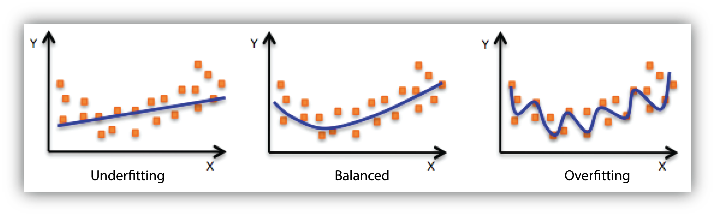
[ref](https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html)

**Underfitting**
- El modelo presentará underfitting en los datos de aprendizaje cuando el rendimiento sea muy deficiente tras el entrenamiento. 
- Esto se debe a que el modelo no puede capturar la relación entre los ejemplos de entrada y los valores de destino. 

_Cómo evitarlo_

- Probar modelos más complejos. El overfitting puede deberse a que el modelo es demasiado sencillo (las características de entrada no son suficientemente expresivas) como para describir el destino adecuadamente. 
- La precisión en los datos de entrenamiento y prueba podría ser deficiente porque el algoritmo de aprendizaje no tenía datos suficientes de los que aprender:
    - Aumentar el número de ejemplos de datos de entrenamiento.
    - Aumentar el número de pases en los datos de entrenamiento existentes.
- Añadir nuevas características específicas del dominio y más productos cartesianos de características, y cambie los tipos de procesamiento de características utilizado (por ejemplo, aumentando el tamaño n-grams).
- Reducir la cantidad de regularización utilizada.

#### Overfitting
- El modelo presentará overfitting en los datos de entrenamiento cuando el modelo presenta un buen rendimiento con los datos de entrenamiento pero no con los datos de evaluación. 
- Esto se debe a que el modelo memoriza los datos que ha visto y no puede generalizar para los ejemplos no vistos.

_Cómo evitarlo_
- Selección de características: considerar el uso de combinaciones de características, la reducción del tamaño n-grams y la reducción del número de contenedores de atributos.
- Aumente la cantidad de regularización utilizada.